# Shopping Trends Analysis – EDA

## The Dataset

Source: Customer Shopping Trends Dataset (https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset)

The "Customer Shopping Trends Dataset" is a synthetic dataset created to learn more about Data Analysis and Machine Learning, focusing on consumer behavior and purchasing patterns. It contains 3,900 entries, each representing a customer purchase, and includes the following 18 attributes:

- Customer ID: A unique identifier for each customer.
- Age: The customer's age.
- Gender: The gender of the customer (Male/Female).
- Item Purchased: The item that the customer purchased.
- Category: The category of the item purchased (e.g., Clothing, Footwear).
- Purchase Amount (USD): The amount of the purchase in USD.
- Location: The location where the purchase was made.
- Size: The size of the purchased item.
- Color: The color of the purchased item.
- Season: The season during which the purchase was made.
- Review Rating: A rating given by the customer for the purchased item, on a scale of 1 to 5.
- Subscription Status: Indicates if the customer has a subscription (Yes/No).
- Shipping Type: The type of shipping chosen by the customer (e.g., Express, Free Shipping, Next Day Air).
- Discount Applied: Indicates if a discount was applied to the purchase (Yes/No).
- Promo Code Used: Indicates if a promo code was used for the purchase (Yes/No).
- Previous Purchases: The total count of transactions concluded by the customer at the store, excluding the ongoing transaction.
- Payment Method: The customer's most preferred payment method (e.g., Cash, Credit Card, PayPal, Venmo).
- Frequency of Purchases: The frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly, Annually).

This dataset serves as an excellent foundation for analyzing and deriving insights into consumer preferences, helping businesses tailor their strategies to meet customer needs and enhance satisfaction.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load & Explore the Dataset

In [2]:
# load the dataset
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.shape

(3900, 18)

In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
# check for missing values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for unique values
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

## 2. Statistics of Individual Columns

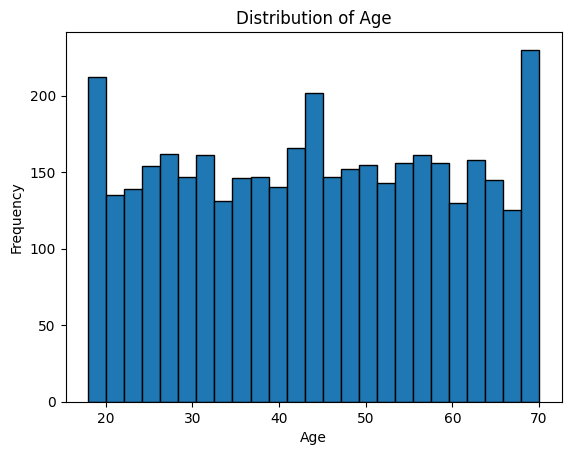

In [10]:
# Distribution of 'Age' 
plt.hist(df['Age'], bins=25, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

**Insight:** The age distribution appears to be bimodal, with two peaks depicting the two predominant age groups within the dataset: Customers younger than 20 and customers in their late 60s. There also seems to be a smaller peak for customers in their mid 40s. The peaks suggest that marketing strategies and product offerings could be tailored to appeal specifically to these two age groups. For example, the products that interest customers in their early 20s may be quite different from those appealing to customers in their late 60s.

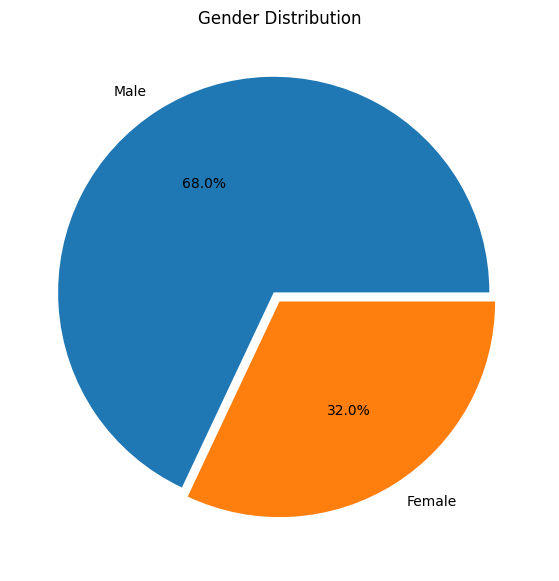

In [11]:
# Pie Chart of 'Gender'
gdr_count = df['Gender'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(gdr_count, labels=gdr_count.index, autopct='%1.1f%%', explode=(0.05, 0))
plt.title('Gender Distribution')
plt.show()

**Insight:** Majority of the customers are male. It may be beneficial for the business to investigate the reasons behind this disparity and consider if male-oriented marketing strategies are more effective or if there are opportunities to better cater to and attract more female customers.

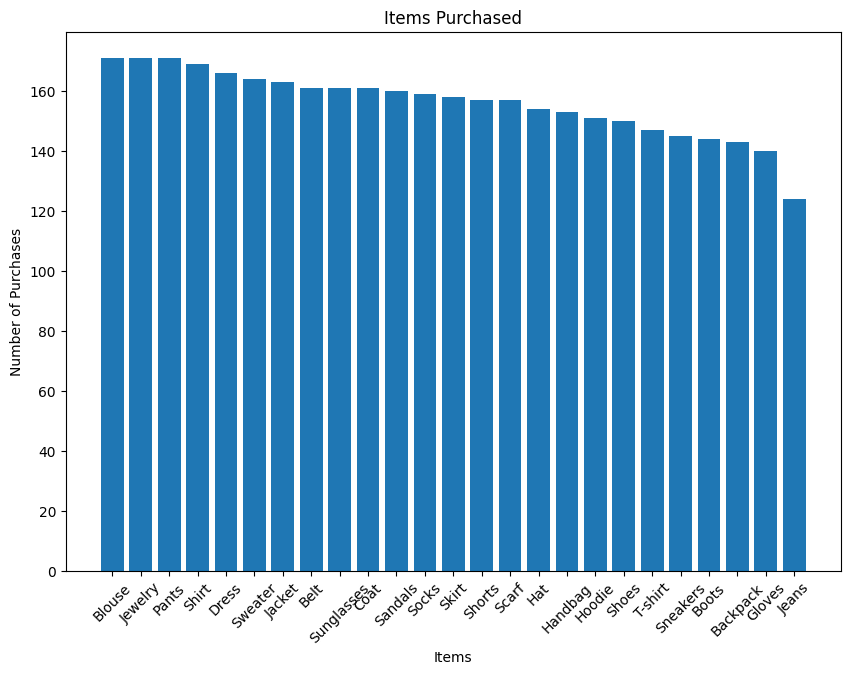

In [12]:
# Bar Chart of 'Item Purchased'
item_count = df['Item Purchased'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 7))
plt.bar(item_count.index, item_count.values)
plt.xlabel('Items')
plt.ylabel('Number of Purchases')
plt.title('Items Purchased')
plt.xticks(rotation=45)
plt.show()

**Insight:** The bar chart shows the number of purchases for different items, with blouses being the most purchased item and jeans the least. The relatively even distribution across most items suggests a diverse range of interests among the customers, with a slight preference for tops like blouses, shirts, and T-shirts. This might indicate that focusing on a variety of stock-keeping units could be beneficial for catering to the broad preferences observed.

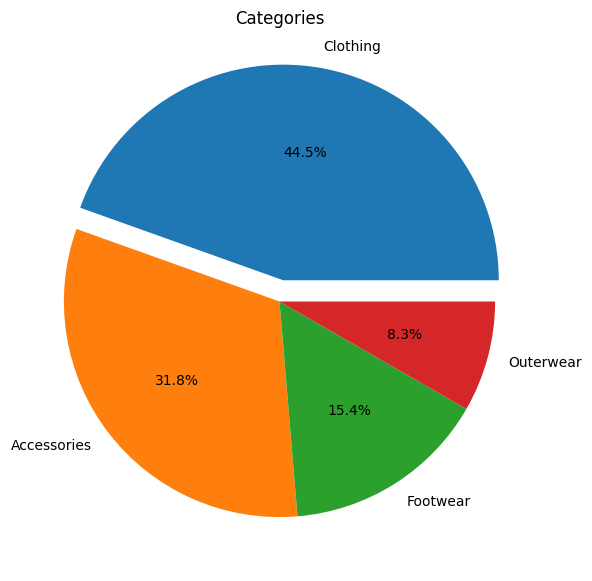

In [13]:
# Pie Chart of 'Category'
cat_count = df['Category'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(cat_count, labels=cat_count.index, autopct='%1.1f%%', explode=(0.1, 0, 0, 0))
plt.title('Categories')
plt.show()

**Insight:** The dominance of Clothing suggests it's a core focus for customers, while the healthy interest in Accessories and Footwear indicates these categories are also key to the retailer's product strategy.

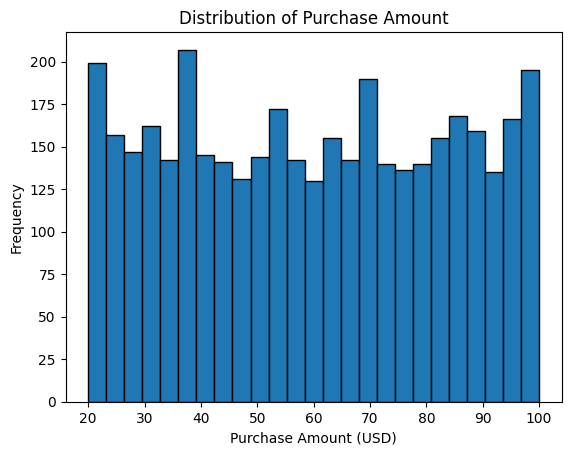

In [14]:
# Distribution of 'Purchase Amount (USD)'
plt.hist(df['Purchase Amount (USD)'], bins=25, edgecolor='black')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')
plt.show()

**Insight:** The customers are not overwhelmingly clustered around a specific price range, which could mean that they have diverse spending habits or that the store offers a wide range of product prices to accommodate different budget levels.

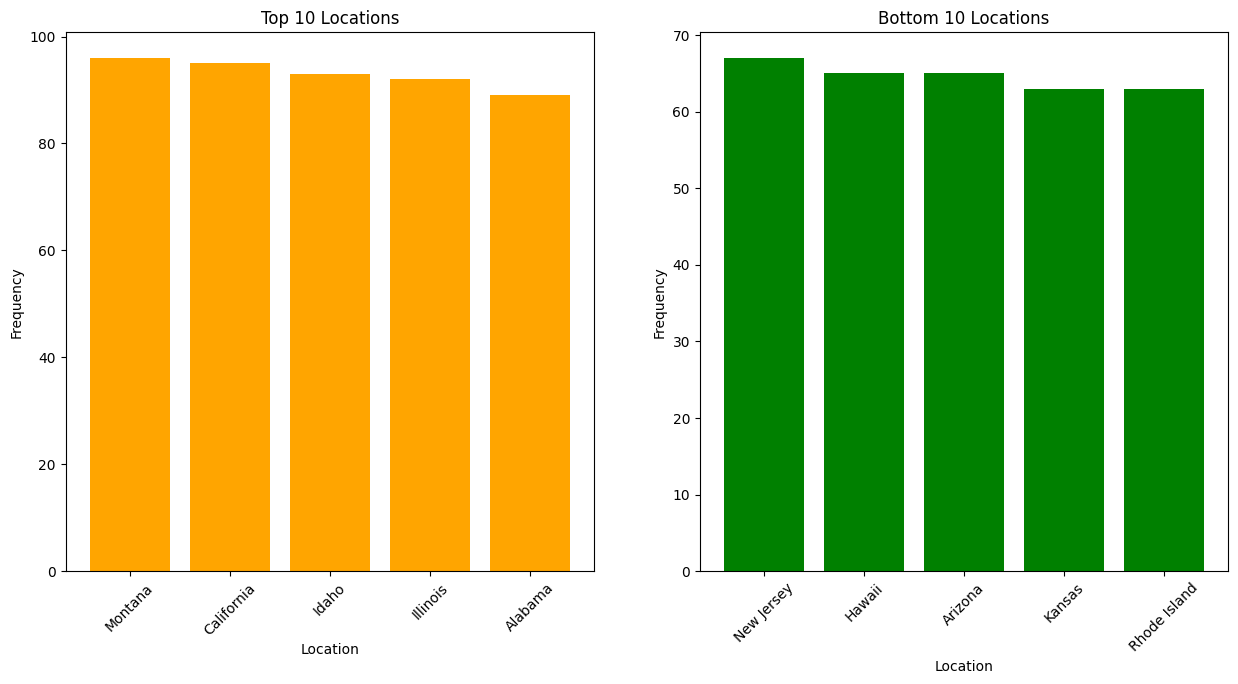

In [15]:
# Side by Side Bar Charts of top 5 'Location' and bottom 5 'Location'
top_loc = df['Location'].value_counts().head(5)
bottom_loc = df['Location'].value_counts().tail(5)

# Create side by side bar charts
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].bar(top_loc.index, top_loc.values, color='orange')
ax[0].set_title('Top 10 Locations')
ax[0].set_xlabel('Location')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(bottom_loc.index, bottom_loc.values, color='green')
ax[1].set_title('Bottom 10 Locations')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('Frequency')
ax[1].tick_params(axis='x', rotation=45)


**Insight:** This could suggest regional preferences or the impact of market penetration and local marketing efforts. It may be beneficial for the business to investigate the underlying factors contributing to these regional sales differences.

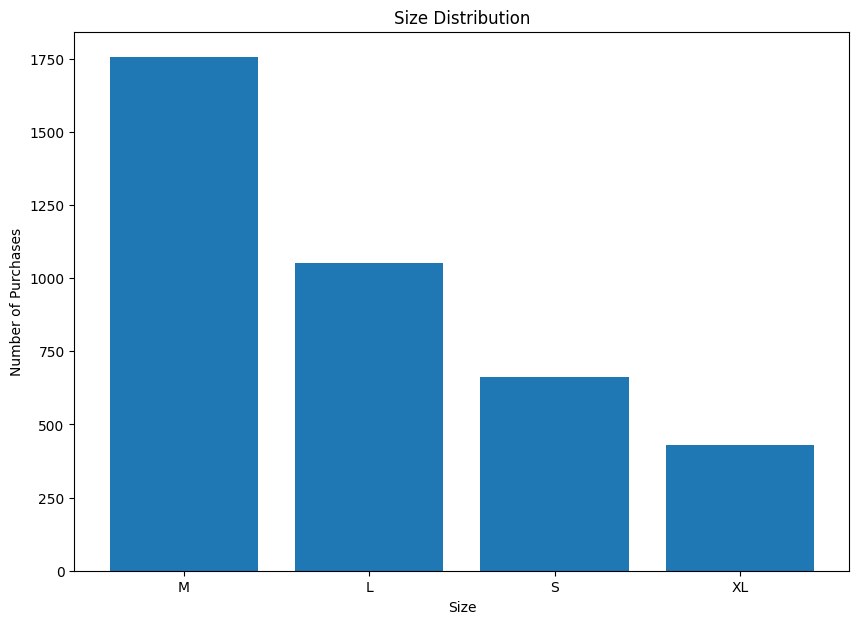

In [16]:
# Bar Chart of 'Size'
size_count = df['Size'].value_counts()

plt.figure(figsize=(10, 7))
plt.bar(size_count.index, size_count.values)
plt.xlabel('Size')
plt.ylabel('Number of Purchases')
plt.title('Size Distribution')
plt.show()

In [17]:
# Percentage Distribution of 'Season'
season_count = df['Season'].value_counts()
season_count = season_count / season_count.sum() * 100
print(season_count.apply(lambda x: str(round(x, 2)) + '%'))

Season
Spring    25.62%
Fall       25.0%
Winter     24.9%
Summer    24.49%
Name: count, dtype: object


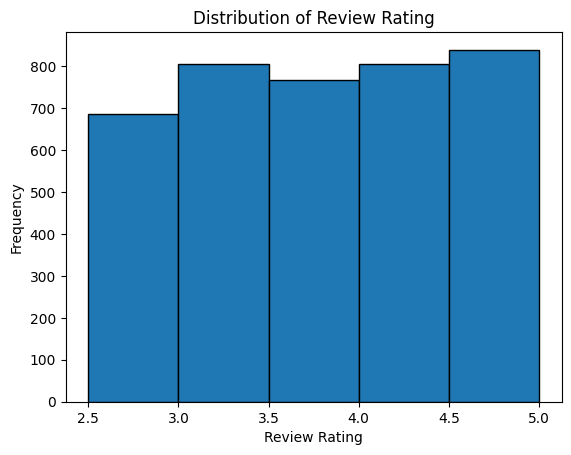

In [18]:
# Distribution of 'Review Rating'
plt.hist(df['Review Rating'], bins=5, edgecolor='black')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Rating')
plt.show()

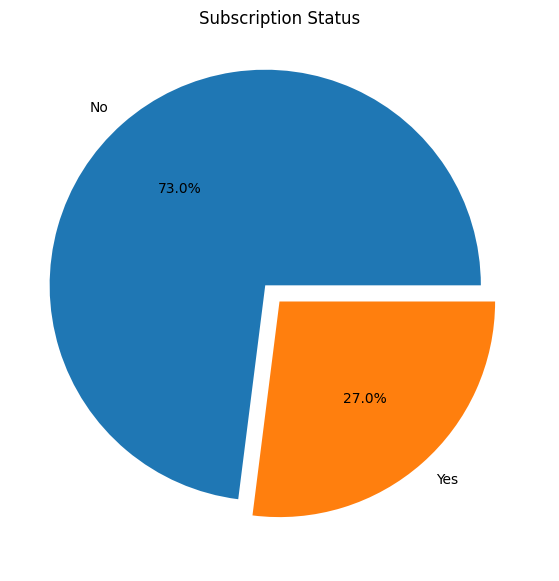

In [19]:
# Pie Chart of 'Subscription Status'
sub_count = df['Subscription Status'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(sub_count, labels=sub_count.index, autopct='%1.1f%%', explode=(0.1, 0))
plt.title('Subscription Status')
plt.show()

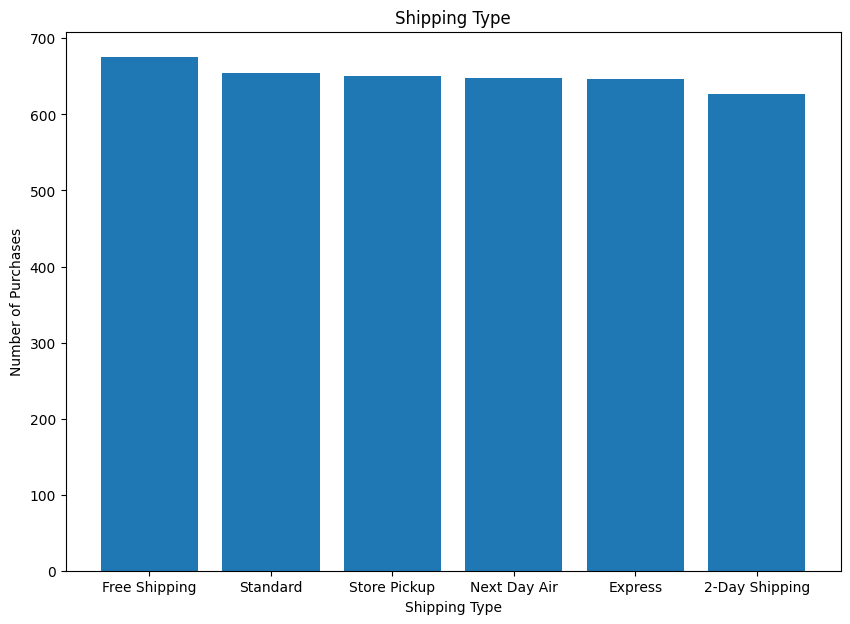

In [20]:
# Bar Chart of 'Shipping Type'
ship_count = df['Shipping Type'].value_counts()

plt.figure(figsize=(10, 7))
plt.bar(ship_count.index, ship_count.values)
plt.xlabel('Shipping Type')
plt.ylabel('Number of Purchases')
plt.title('Shipping Type')
plt.show()

In [21]:
# A function to look at the percentage distribution of the remaining columns

def print_percentage_distribution(df, column_name):
    count = df[column_name].value_counts()
    percentage = count / count.sum() * 100
    print(f"Percentage distribution for {column_name}:")
    print(percentage.apply(lambda x: f"{round(x, 2)}%"))
    print()  # For better readability

# Call the function for each column
print_percentage_distribution(df, 'Discount Applied')
print_percentage_distribution(df, 'Promo Code Used')
print_percentage_distribution(df, 'Payment Method')
print_percentage_distribution(df, 'Frequency of Purchases')

Percentage distribution for Discount Applied:
Discount Applied
No     57.0%
Yes    43.0%
Name: count, dtype: object

Percentage distribution for Promo Code Used:
Promo Code Used
No     57.0%
Yes    43.0%
Name: count, dtype: object

Percentage distribution for Payment Method:
Payment Method
PayPal           17.36%
Credit Card      17.21%
Cash             17.18%
Debit Card       16.31%
Venmo            16.26%
Bank Transfer    15.69%
Name: count, dtype: object

Percentage distribution for Frequency of Purchases:
Frequency of Purchases
Every 3 Months    14.97%
Annually          14.67%
Quarterly         14.44%
Monthly           14.18%
Bi-Weekly         14.03%
Fortnightly        13.9%
Weekly            13.82%
Name: count, dtype: object



## 3. Bivariate & Multivariate Analysis and Categorical Comparisons

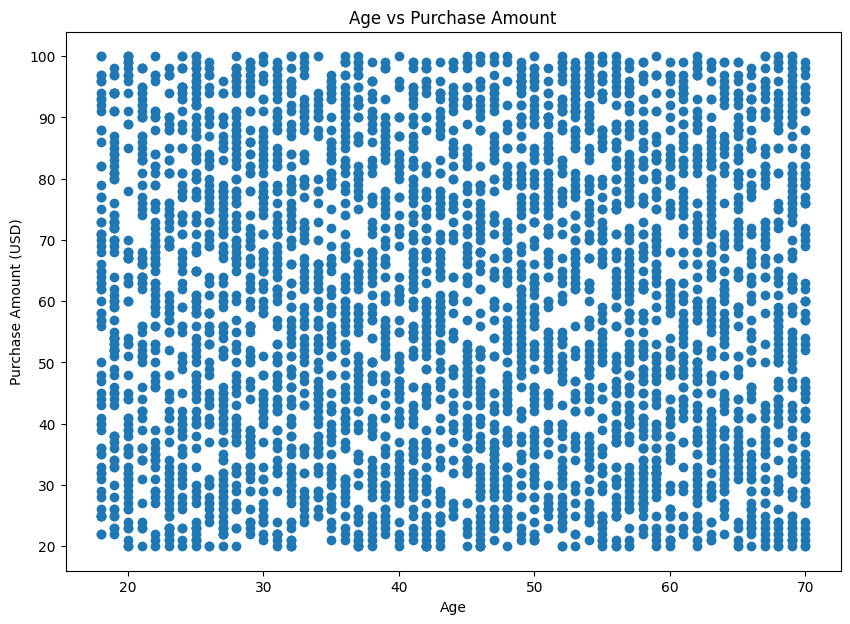

In [22]:
# Scatterplot of 'Age' vs 'Purchase Amount (USD)'
plt.figure(figsize=(10, 7))
plt.scatter(df['Age'], df['Purchase Amount (USD)'])
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Age vs Purchase Amount')
plt.show()

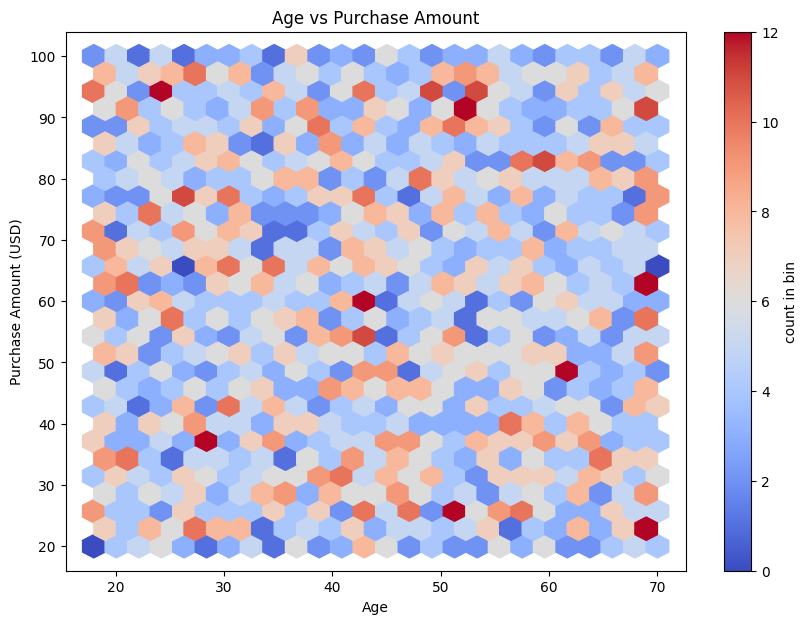

In [23]:
# Hexbin plot of 'Age' vs 'Purchase Amount (USD)'
plt.figure(figsize=(10, 7))
plt.hexbin(df['Age'], df['Purchase Amount (USD)'], gridsize=25, cmap='coolwarm')
plt.colorbar(label='count in bin')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Age vs Purchase Amount')
plt.show()

**Insight:** This implies a uniform spending behavior across different ages within the dataset.

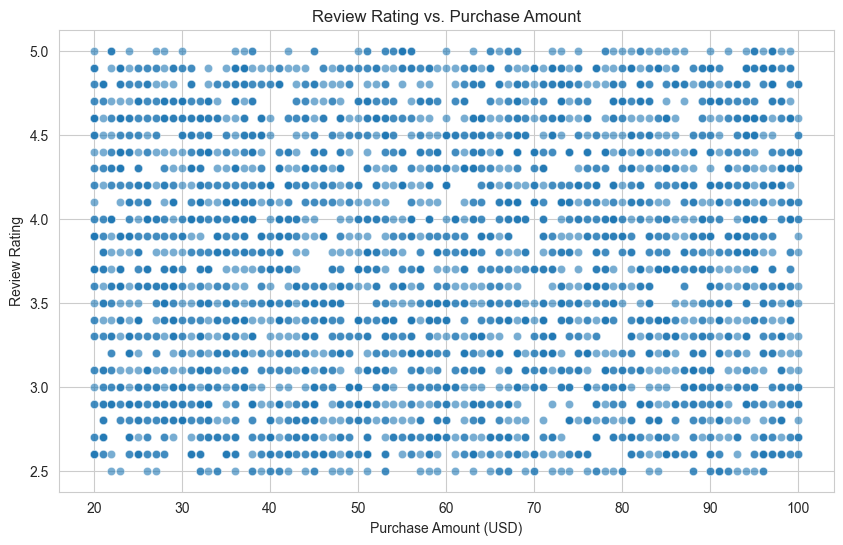

In [24]:
# Scatterplot of Review Rating vs. Purchase Amount
sns.set_style("whitegrid")

# Plotting Review Rating vs. Purchase Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Purchase Amount (USD)', y='Review Rating', alpha=0.6)
plt.title('Review Rating vs. Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()

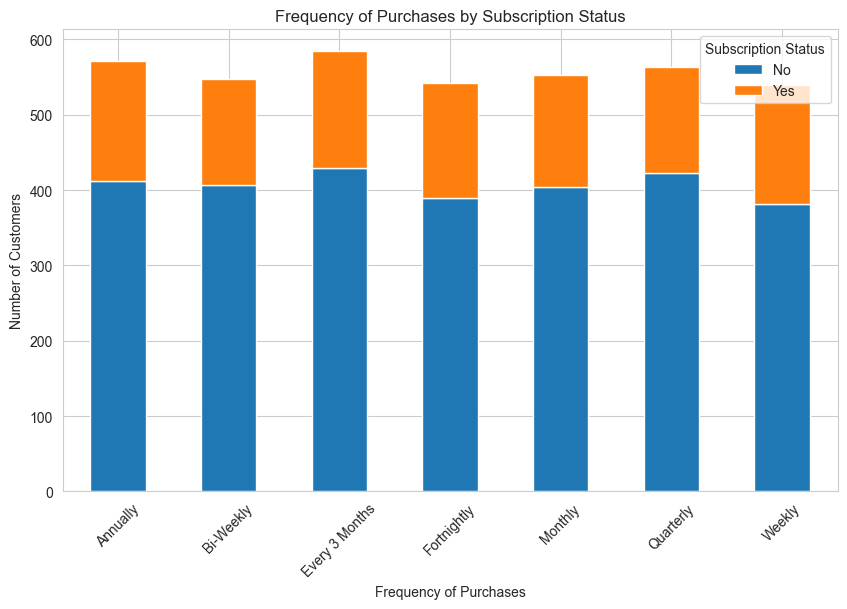

In [25]:
# Stacked Bar Chart of Frequency of Purchases by Subscription Status
frequency_counts = df.groupby(['Frequency of Purchases', 'Subscription Status']).size().unstack(fill_value=0)

frequency_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Frequency of Purchases by Subscription Status')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.show()

In [26]:
# Average Purchase Amount by Gender
avg_purchase_amount = df.groupby('Gender')
avg_purchase_amount = avg_purchase_amount['Purchase Amount (USD)'].mean()
print(avg_purchase_amount)

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


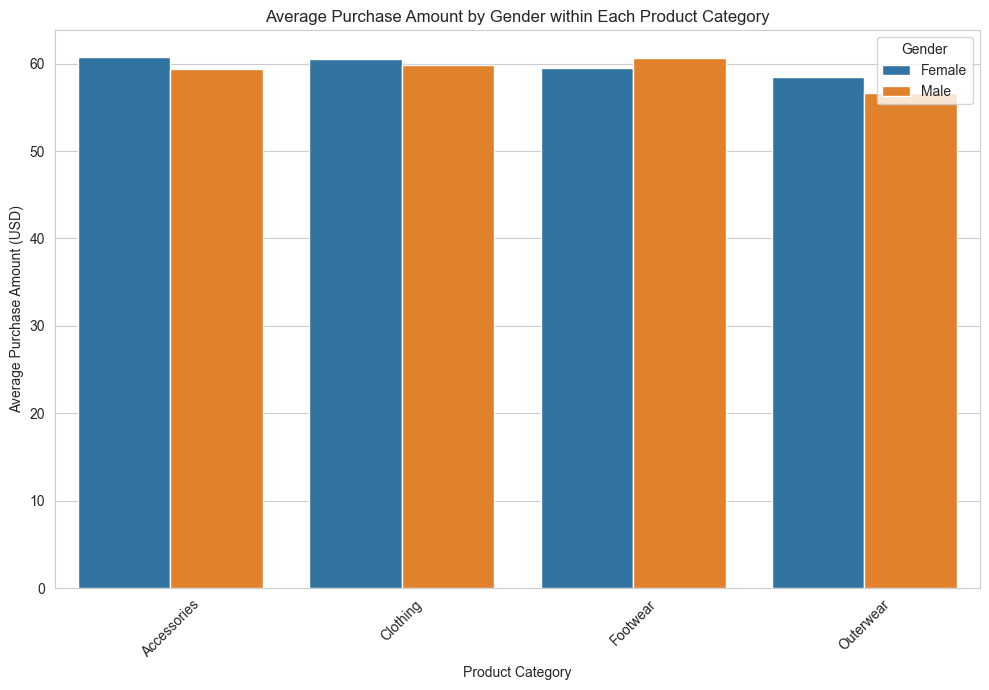

In [27]:
# Grouped Bar Chart of Avg Purchase Amount by Gender within Each Product Category
grouped_data = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()

# Now, use seaborn to create the grouped bar chart
plt.figure(figsize=(10, 7))
sns.barplot(data=grouped_data, x='Category', y='Purchase Amount (USD)', hue='Gender')
plt.title('Average Purchase Amount by Gender within Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to make room for the rotated category names
plt.show()

**Insight:** Males and females spend similar amounts on Accessories and Clothing, but differences emerge in Footwear and Outerwear. Females, on average, spend more on Footwear, while males spend more on Outerwear. This suggests that gender-specific preferences or priorities may influence spending in certain product categories, which could guide targeted marketing strategies and inventory decisions.

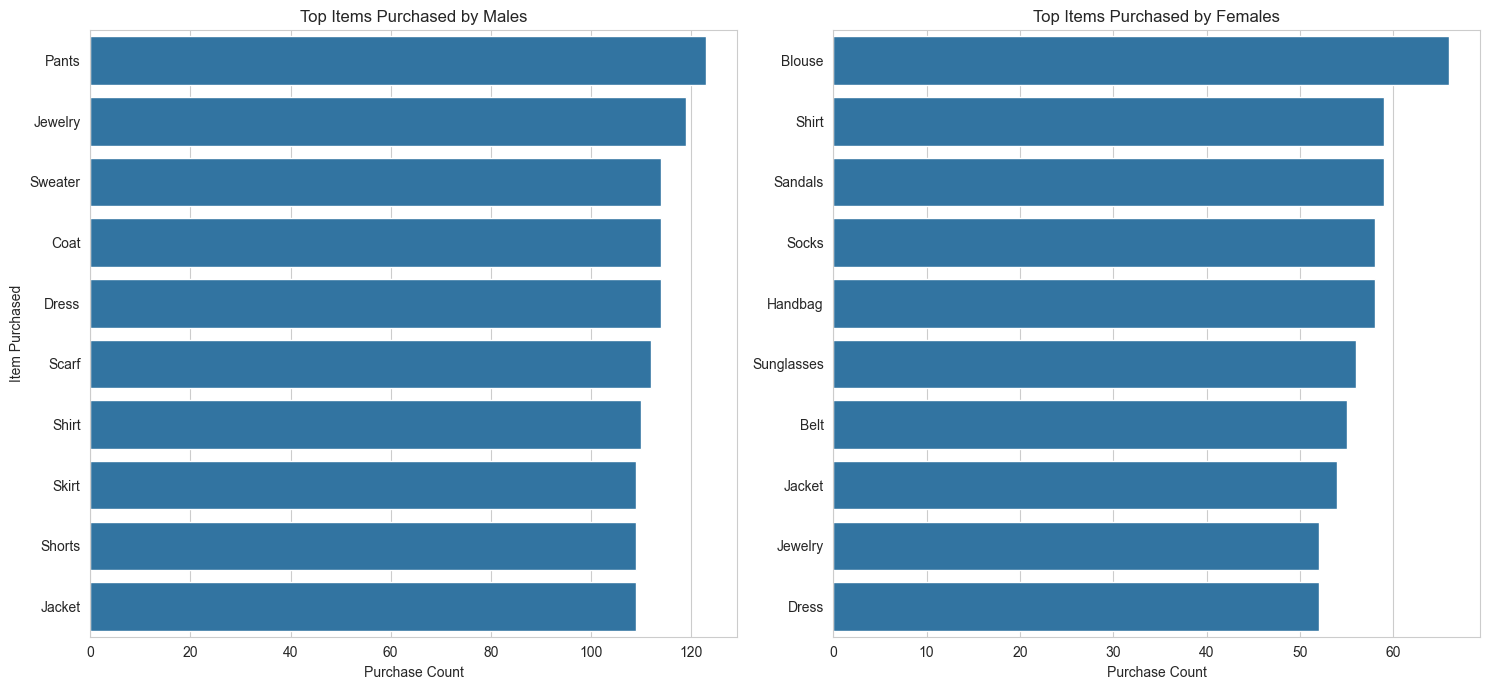

In [28]:
# Top 10 Products by Gender
N = 10

# Filter and count items purchased by each gender
items_by_gender = df.groupby(['Gender', 'Item Purchased']).size().reset_index(name='Count')

# Sort and select the top N items for each gender
top_items_male = items_by_gender[items_by_gender['Gender'] == 'Male'].sort_values(by='Count', ascending=False).head(N)
top_items_female = items_by_gender[items_by_gender['Gender'] == 'Female'].sort_values(by='Count', ascending=False).head(N)

# Plotting
plt.figure(figsize=(15, 7))

# Plot for Male
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(data=top_items_male, x='Count', y='Item Purchased')
plt.title('Top Items Purchased by Males')
plt.xlabel('Purchase Count')
plt.ylabel('Item Purchased')

# Plot for Female
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(data=top_items_female, x='Count', y='Item Purchased')
plt.title('Top Items Purchased by Females')
plt.xlabel('Purchase Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Insight:** The charts highlight gender-specific purchasing preferences, with females showing a varied interest in both clothing items and accessories, and males more frequently purchasing a variety of clothing items like Shirts and Jackets but less frequently purchasing accessories and footwear. Understanding these preferences can help tailor inventory and marketing campaigns to better align with the purchasing patterns of each gender.

## Summary Insights:

In summary, our exploratory data analysis has provided valuable insights into consumer shopping patterns within this dataset. We've observed distinct purchasing preferences based on gender, with males predominantly buying Pants and females favoring Blouses. The age distribution showed a bimodal pattern, with significant customer groupings in the early 20s and early 60s. Moreover, the spending habits across different product categories highlighted the importance of Clothing and Accessories, with notable differences in Footwear and Outerwear spending between genders.

The distribution of purchases across locations and the varied spending in different categories suggest opportunities for targeted marketing strategies and product placement. Overall, the insights gained from this analysis can inform business decisions aimed at enhancing the customer experience and maximizing sales performance.

----------------------------- THE END ----------------------------------